In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('/Users/jaygamage/Downloads/rdata.csv')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Display the first few rows of the dataframe
data.head()

Date                     0
Group_Code               0
Material_Group           0
Sales_Quantity           0
Advertising_Promotion    0
dtype: int64


,Date,Group_Code,Material_Group,Sales_Quantity,Advertising_Promotion
0,2016-01-31,FG0001,Motor Cycle TT,8897,298.74
1,2016-01-31,FG0002,Motor Cycle TL,8781,106.86
2,2016-01-31,FG0003,Scooter TT,6665,0.00
3,2016-01-31,FG0004,Scooter TL,5225,71.23
4,2016-01-31,FG0005,3 Wheeler,11683,294.51


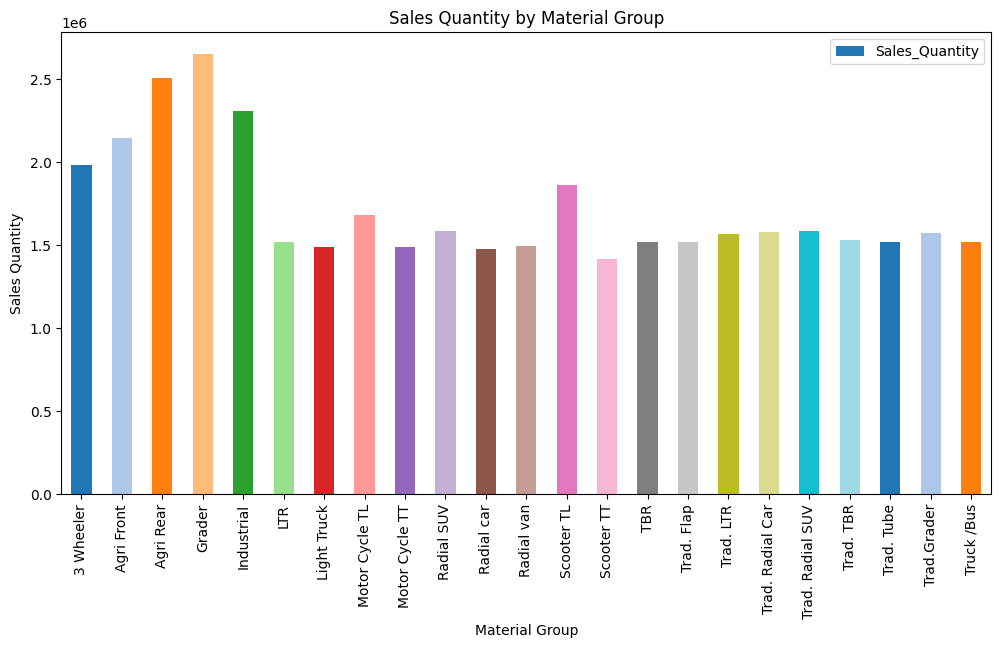

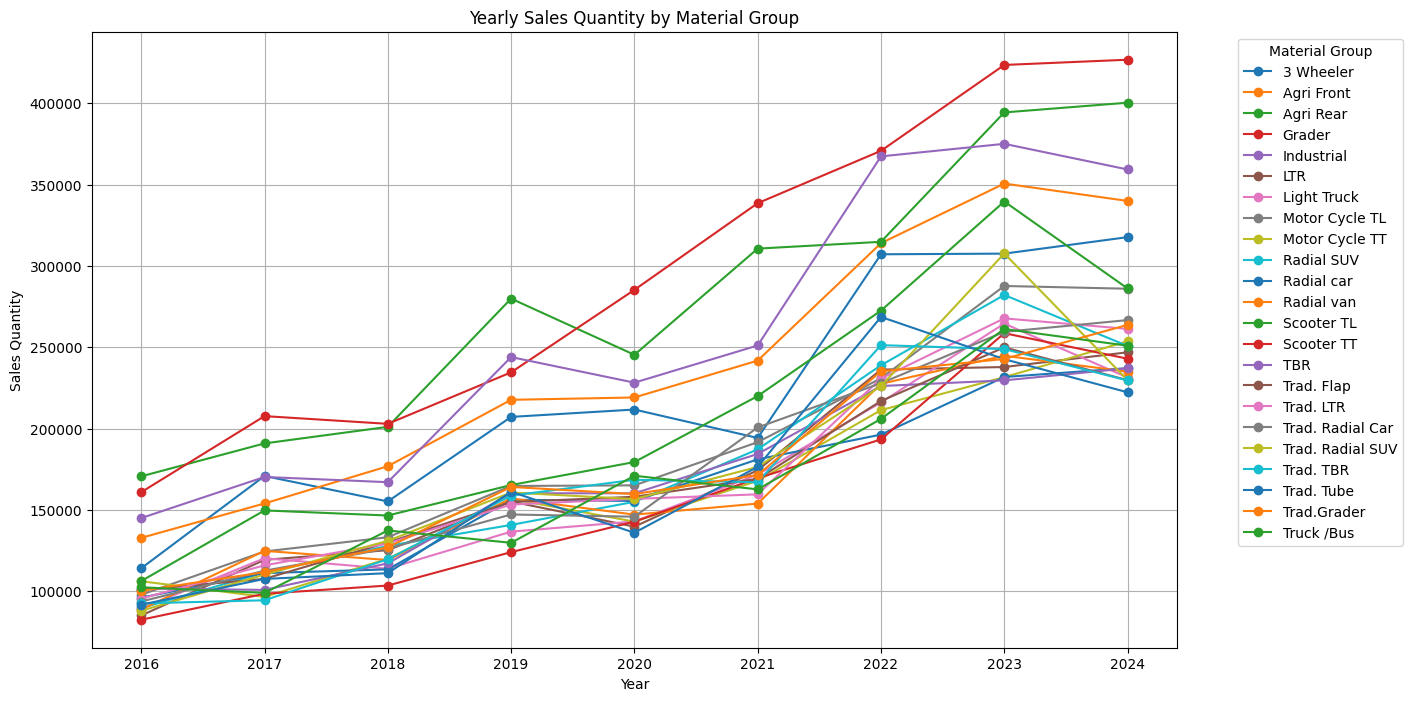

In [8]:
import matplotlib.pyplot as plt

# Generate a color map
colors = plt.cm.tab20.colors

# Plot with different colors for each category
category_sales.plot(x='Material_Group', y='Sales_Quantity', kind='bar', figsize=(12, 6), color=colors)
plt.xticks(rotation=90)
plt.title('Sales Quantity by Material Group')
plt.xlabel('Material Group')
plt.ylabel('Sales Quantity')
plt.show()

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Group the data by 'Material_Group' and 'Year' and sum the 'Sales_Quantity'
yearly_sales = data.groupby(['Material_Group', 'Year'])['Sales_Quantity'].sum().reset_index()

# Pivot the data to have 'Year' as index and 'Material_Group' as columns
pivot_data = yearly_sales.pivot(index='Year', columns='Material_Group', values='Sales_Quantity')

# Plot the data
pivot_data.plot(figsize=(14, 8), marker='o')
plt.title('Yearly Sales Quantity by Material Group')
plt.xlabel('Year')
plt.ylabel('Sales Quantity')
plt.legend(title='Material Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [3]:
# Load the new data
dataf_c = pd.read_csv('/Users/jaygamage/Downloads/dataf_c.csv')

# Check for missing values
missing_values = dataf_c.isnull().sum()
print(missing_values)

# Display the first few rows of the new dataframe
dataf_c.head()

date               0
petrol95           0
petrol92           0
auto_diesel        0
super_diesel       0
gdp                0
ncpi               0
crudeoil           0
num_of_holidays    0
traffic_index      0
ads_promo          0
dtype: int64


,date,petrol95,petrol92,auto_diesel,super_diesel,gdp,ncpi,crudeoil,num_of_holidays,traffic_index,ads_promo
0,2016-01-31,128.0,117.0,95.0,110.0,3190164.24,112.0,31.98,1,234.8,109.46
1,2016-02-29,128.0,117.0,95.0,110.0,3190164.24,110.8,30.84,1,234.8,2877.80
2,2016-03-31,128.0,117.0,95.0,110.0,3190164.24,110.0,37.02,0,234.8,0.00
3,2016-04-30,128.0,117.0,95.0,110.0,2999854.19,111.6,40.79,1,234.8,4592.19
4,2016-05-31,128.0,117.0,95.0,110.0,2999854.19,113.7,46.74,2,234.8,0.00


In [8]:
def merge_data_by_date(datas_path, dataf_c_path, output_path=None):
    # Load the provided CSV files
    datas_df = pd.read_csv(datas_path)
    dataf_c_df = pd.read_csv(dataf_c_path)

    # Ensure the column names match (rename if necessary)
    datas_df.rename(columns={'Date': 'date'}, inplace=True)

    # Merge the datasets on the 'date' column
    merged_df = pd.merge(datas_df, dataf_c_df, on='date', how='left')

    # Optionally, save the merged dataframe to a new CSV file
    if output_path:
        merged_df.to_csv(output_path, index=False)

    return merged_df

# Define file paths
rdata_path = "/Users/jaygamage/Downloads/rdata.csv"
dataf_c_path = "/Users/jaygamage/Downloads/dataf_c.csv"
output_path = "/Users/jaygamage/Downloads/merged_data.csv"

# Run the merging function
merged_df = merge_data_by_date(rdata_path, dataf_c_path, output_path)

# Display the first few rows of the merged dataset
print(merged_df.head())


         date Group_Code  Material_Group  Sales_Quantity  petrol95  petrol92  \
0  2016-01-31     FG0001  Motor Cycle TT            8897     128.0     117.0   
1  2016-01-31     FG0002  Motor Cycle TL            8781     128.0     117.0   
2  2016-01-31     FG0003      Scooter TT            6665     128.0     117.0   
3  2016-01-31     FG0004      Scooter TL            5225     128.0     117.0   
4  2016-01-31     FG0005       3 Wheeler           11683     128.0     117.0   

   auto_diesel  super_diesel         gdp   ncpi  crudeoil  num_of_holidays  \
0         95.0         110.0  3190164.24  112.0     31.98              1.0   
1         95.0         110.0  3190164.24  112.0     31.98              1.0   
2         95.0         110.0  3190164.24  112.0     31.98              1.0   
3         95.0         110.0  3190164.24  112.0     31.98              1.0   
4         95.0         110.0  3190164.24  112.0     31.98              1.0   

   traffic_index  
0          234.8  
1          2

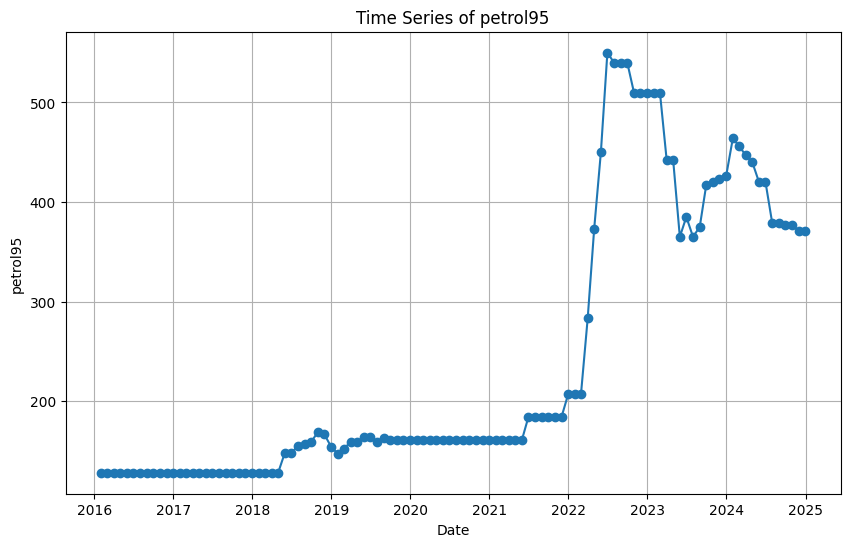

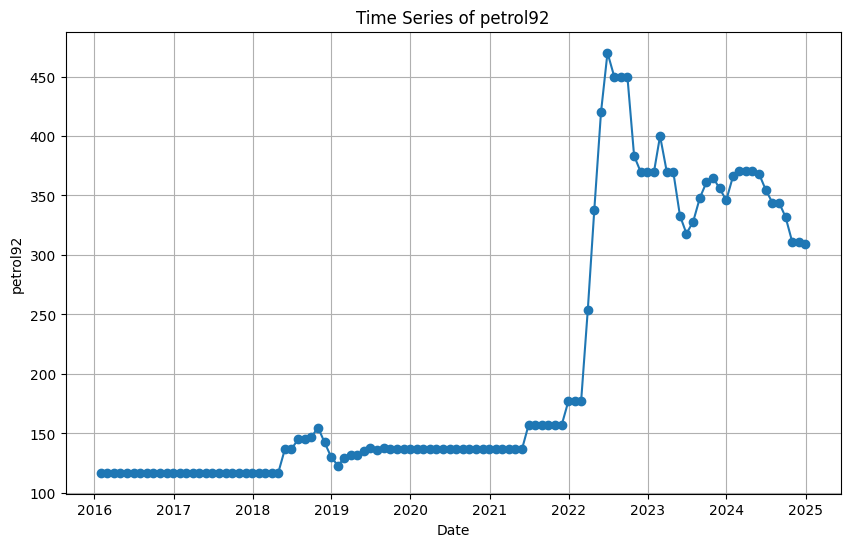

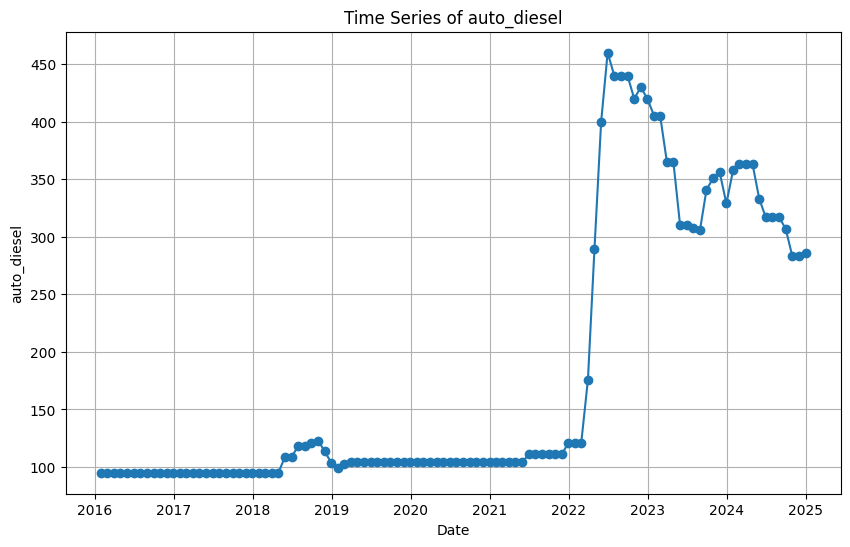

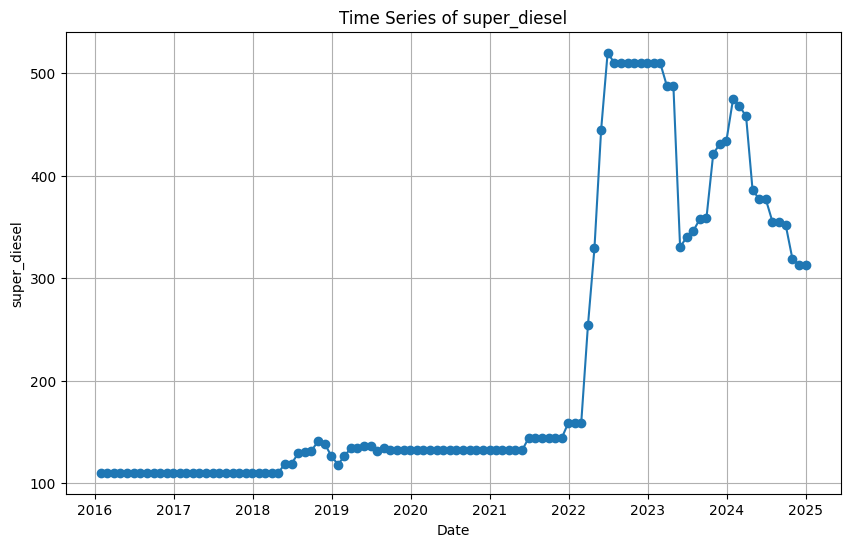

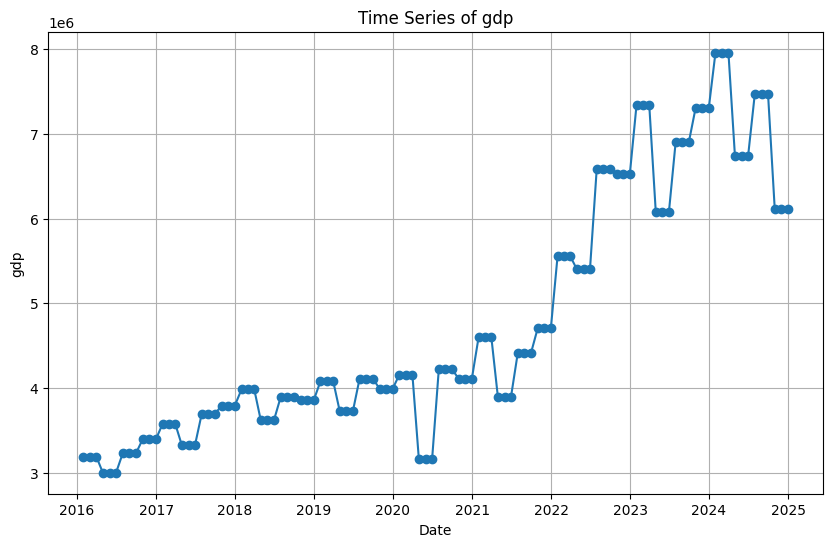

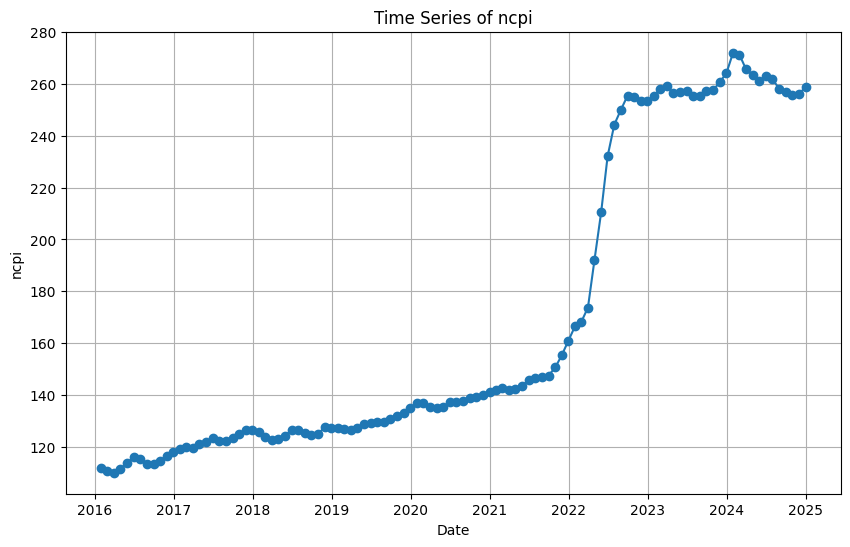

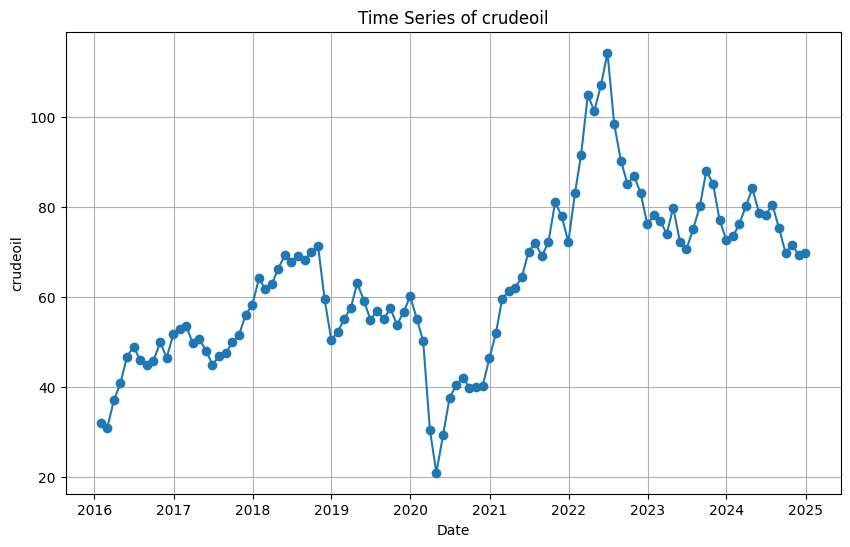

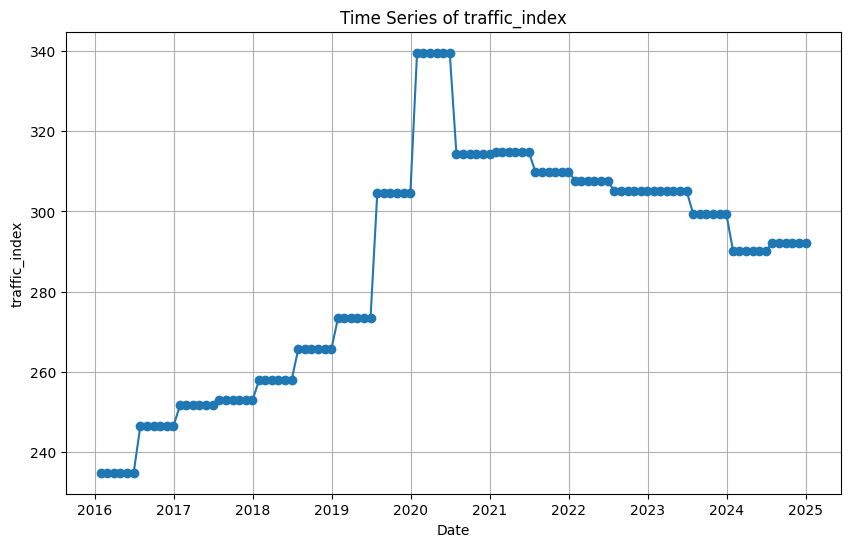

In [12]:
import matplotlib.pyplot as plt

# Load the new data
dataf_c = pd.read_csv(dataf_c_path)
# Remove the 'num_of_holidays' column
dataf_c.drop(columns=['num_of_holidays'], inplace=True)
# Convert the 'date' column to datetime format
dataf_c['date'] = pd.to_datetime(dataf_c['date'])

# Set the 'date' column as the index
dataf_c.set_index('date', inplace=True)

# Define the columns to plot
columns_to_plot = ['petrol95', 'petrol92', 'auto_diesel', 'super_diesel', 'gdp', 'ncpi', 'crudeoil', 'traffic_index']

# Plot each column in the list 'columns_to_plot'
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(dataf_c.index, dataf_c[column], marker='o')
    plt.title(f'Time Series of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()